# **Plants Seedling Classification - Project Statement**

## **Background and Context**

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need 
to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural 
technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants 
and weeds, which takes a lot of time and effort in the long term.

The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on 
the requirement for manual labor, and this is where Artificial Intelligence can benefit the workers in this field, as the 
time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning. The 
ability to do so far more efficiently and even more effectively than experienced manual labor could lead to better crop 
yields, the freeing up of human involvement for higher-order agricultural decision making, and in the long term will result 
in more sustainable environmental practices in agriculture as well.

## **Objective**

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has provided the 
data containing images of unique plants belonging to 12 different species. You being a data scientist, need to build a 
Convolutional Neural Network model which would classify the plant seedlings into their respective 12 categories.

The goal of the project is to create a classifier capable of determining a plant's species from an image.

## **Data Description**

This dataset contains images of unique plants belonging to 12 different species.
 * The data file names are:
   - images.npy
   - Label.csv
 * Due to the large volume of data, the images were converted to numpy arrays and stored in images.npy file and the corresponding labels are also put into Labels.csv so that you can work on the data/project seamlessly without having to worry about the high data volume.


- **List of Plant species**

 - Black-grass
 - Charlock
 - Cleavers
 - Common Chickweed
 - Common Wheat
 - Fat Hen
 - Loose Silky-bent
 - Maize
 - Scentless Mayweed
 - Shepherds Purse
 - Small-flowered Cranesbill
 - Sugar beet

## **Importing the necessary libraries**

In [96]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix

# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## **1) Load dataset and Summary**

In [97]:
# Mount Google drive to access the dataset (monkeys_dataset.zip)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:
# Load the image file of the dataset
images = np.load('/content/drive/MyDrive/images_2.npy')

# Load the labels file of the dataset
labels = pd.read_csv('/content/drive/MyDrive/Labels_2.csv')

### **Overview of the dataset**

#### <b> Let's print the shape of the images and labels 

In [99]:
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


There are 4750 RGB  images of shape 128 x 128 X 3, each image having 3 channels.

In [100]:
images[0]

array([[[ 35,  52,  78],
        [ 36,  49,  76],
        [ 31,  45,  69],
        ...,
        [ 78,  95, 114],
        [ 76,  93, 110],
        [ 80,  95, 109]],

       [[ 33,  46,  68],
        [ 37,  50,  73],
        [ 48,  65,  83],
        ...,
        [ 81,  96, 113],
        [ 74,  89, 105],
        [ 83,  95, 109]],

       [[ 34,  50,  68],
        [ 35,  52,  72],
        [ 70,  85, 101],
        ...,
        [ 83,  97, 112],
        [ 79,  94, 108],
        [ 79,  94, 107]],

       ...,

       [[ 35,  50,  69],
        [ 42,  57,  73],
        [ 42,  57,  72],
        ...,
        [ 60,  76,  92],
        [ 67,  81,  97],
        [ 64,  77,  95]],

       [[ 36,  52,  67],
        [ 48,  63,  78],
        [ 41,  57,  73],
        ...,
        [ 44,  66,  83],
        [ 58,  76,  91],
        [ 57,  74,  90]],

       [[ 44,  58,  70],
        [ 43,  57,  73],
        [ 40,  55,  72],
        ...,
        [ 41,  70,  92],
        [ 55,  78,  97],
        [ 61,  79,  96]]

In [101]:
labels['Label'][0]

'Small-flowered Cranesbill'

#### <b> Checking  the proportion of each class.

In [102]:
labels['Label'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'


Loose Silky-bent             13.8%
Common Chickweed             12.9%
Scentless Mayweed            10.9%
Small-flowered Cranesbill    10.4%
Fat Hen                      10.0%
Charlock                      8.2%
Sugar beet                    8.1%
Cleavers                      6.0%
Black-grass                   5.5%
Shepherds Purse               4.9%
Common wheat                  4.7%
Maize                         4.7%
Name: Label, dtype: object

- The categories of labels with biggest numer of images is `Loose Silky-bent` (almost 14%), respectively followed by `Common Chickweed`, `Scentless Mayweed`, `Small-flowered Cranesbill` and `Fat Hen` with 10% each or more.
- The other classes of plants are less than 10% (from 4.7% to 8.2%).

**What clearly shows that the dataset is imbalanced**

#### <b> Plotting images using OpenCV and matplotlib

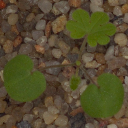

In [103]:
cv2_imshow(images[8])

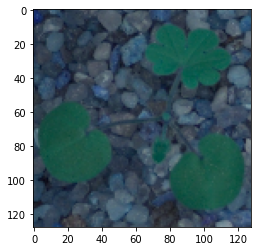

In [104]:
plt.imshow(images[8])

- We can observe that the images are being shown in different colors when plotted with openCV and matplotlib as OpenCV reads images in BGR format and this shows that the given numpy arrays were generated from the original images using OpenCV.
- Now we will convert these BGR images to RGB images so we could interpret them easily.

In [105]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

#### <b> Plot the images from each class and print their corresponding labels

In [106]:
def plot_images(images,labels):
  num_classes=12                                                                  # Number of Classes
  categories=np.unique(labels)   
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image 
          ax.set_title(keys[random_index])
  plt.show()

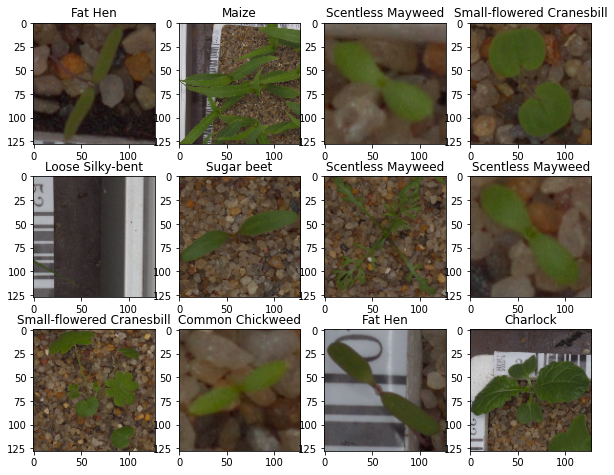

In [107]:
plot_images(images,labels)

## **2) Exploratory Data Analysis**

#### <b> Checking for data imbalance wiht a countplot for each category

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

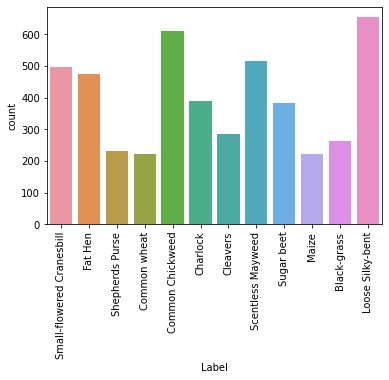

In [108]:
count_plot = sns.countplot(labels['Label'])
plt.xticks(rotation='vertical')

As we can see from the above plot, we can confirm as mentionned above that **the dataset is imbalanced** as the labels (categories) Shepherds Purse, Common wheat, Maize, Black-grass and Cleavers count around 200 to 300 images each, while others classes count at least 400 and more images each. Two labels, Common Chickweed and Loose Silky-bent count more than 600 images each.

#### <b> Convert our labels value counts into dictionary

In [109]:
values = labels['Label'].value_counts(dropna=False).keys().tolist()
counts = labels['Label'].value_counts(dropna=False).tolist()
value_dict = dict(zip(values, counts))

In [110]:
value_dict

{'Black-grass': 263,
 'Charlock': 390,
 'Cleavers': 287,
 'Common Chickweed': 611,
 'Common wheat': 221,
 'Fat Hen': 475,
 'Loose Silky-bent': 654,
 'Maize': 221,
 'Scentless Mayweed': 516,
 'Shepherds Purse': 231,
 'Small-flowered Cranesbill': 496,
 'Sugar beet': 385}

## **3) Illustration of the insights based on EDA**

**Below are some key meaningful observations from our EDA:**
- There are 4750 RGB images of shape 128 x 128 X 3, each image having 3 channels. All the images have the same size which is a good thing for our CNN architecture.

- **About the image channels**, 
 - We observed that the images are being shown in different colors when plotted with openCV and matplotlib as OpenCV reads images in BGR format.This shows that the given numpy arrays were generated from the original images using OpenCV.
  - Following that, we converte the BGR images to RGB images so we could interpret them easily.

- The classes of our images are the following: classes = [`Small-flowered Cranesbill`,`Fat Hen`,`Shepherds Purse`,`Common Wheat`,`Common Chickweed`,`Charlock`, `Cleavers`,`Scentless Mayweed`,`Sugar beet`,`Maize`,`Black-grass`,`Loose Silky-bent`]

- **Concerning the proportion of each class**,
 - The categories of labels with biggest numer of images is `Loose Silky-bent` (almost 14%), respectively followed by `Common Chickweed`, `Scentless Mayweed`, `Small-flowered Cranesbill` and `Fat Hen` with 10% each or more.
 - The other classes of plants are less than 10% (from 4.7% to 8.2%).

**What clearly shows that the dataset is imbalanced**

- The countplot confirms plot that **the dataset is imbalanced** as the labels (categories) `Shepherds Purse`, `Common wheat`, `Maize`, `Black-grass` and `Cleavers` count around 200 to 300 images each, while others classes count at least 400 and more images each. Two labels, `Common Chickweed` and `Loose Silky-bent` count more than 600 images each.

## **4) Data Pre-processing**

#### <b> Resizing images 

- Even though the large size of the images (128, 128) which may be computationally expensive to train on these larger images, **we will not reduce the image size. This to avoid losing information.**

#### <b> Visualizing images using Gaussian Blur to remove unwanted noise

In [111]:
# Applying Gaussian Blur to denoise the images
images_gb=[]
for i in range(len(images)):
  # gb[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
  images_gb.append(cv2.GaussianBlur(images[i], ksize =(3,3),sigmaX =  0))

**As images_gb is from type list, we have to convert it into a type ndarray to make the manipulation easier**

In [112]:
arr_image_gb = np.array(images_gb)

In [113]:
def plot_images(arr_image_gb,labels):
  num_classes=12                                                                  # Number of Classes
  categories=np.unique(labels)   
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(arr_image_gb[random_index, :])                                      # Plotting the image 
          ax.set_title(keys[random_index])
  plt.show()

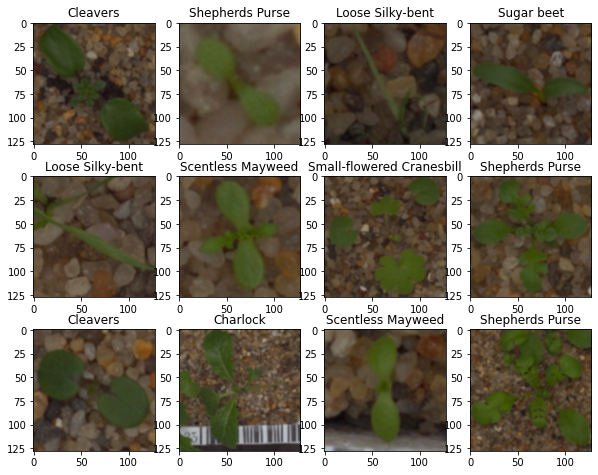

In [114]:
# Visualizing the Gaussian blurred images
plot_images(arr_image_gb,labels)

#### <b> Comparing histograms of an original image with a blurred image

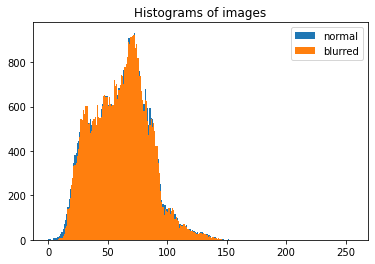

In [115]:
plt.hist(images[5].ravel(),256,[0,256], label='normal')
plt.hist(arr_image_gb[5].ravel(),256,[0,256], label='blurred')
plt.title('Histograms of images')
plt.legend()
plt.show()

- When comparing original and blurred images, It appears there is not too much difference and the too much noise, between the GaussianBlur (denoised) picture and the original image. So, even if the blurred or denoised image does not seem to remove so much noise, it keeps relevant information. Therefore, we will continue with the blurred as principal images.

#### <b> Plot the images before and after the pre-processing steps

Text(0.5, 1.0, 'Blurred image')

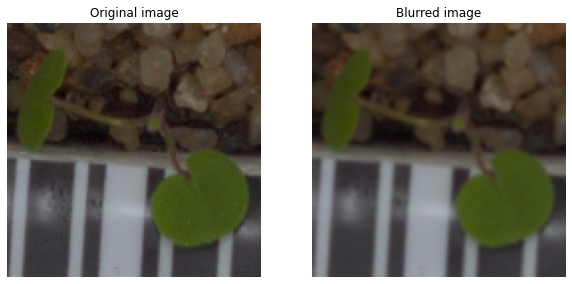

In [116]:
# code for displaying multiple images in one figure
  
# create figure
fig = plt.figure(figsize=(10, 10))
  
# setting values to rows and column variables
rows = 1
columns = 2
  
# reading images
image1 = images[10]
image2 = arr_image_gb[10]
Image1 = image1
Image2 = image2
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title("Original image")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(Image2)
plt.axis('off')
plt.title("Blurred image")

#### <b> Splitting the dataset

- As we have less than 5000 images in our dataset, we will only use 20% of our data for testing, 10% of our data for validation and 70% of our data for training.
- We are using the train_test_split() function from scikit-learn. Here, we split the dataset into three parts, train,test and validation.

In [117]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(np.array(arr_image_gb),labels , test_size=0.2, random_state=42,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.1, random_state=42,stratify=y_temp)

In [118]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3420, 128, 128, 3) (3420, 1)
(380, 128, 128, 3) (380, 1)
(950, 128, 128, 3) (950, 1)


## **5) Make data compatible**

- Convert labels from names to one hot vectors
- Normalizing the values

#### <b> Convert labels from digits to one hot vector

In [119]:
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder 

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

In [120]:
# Check the shape of the data
print(y_train_encoded.shape)
print(y_val_encoded.shape)
print(y_test_encoded.shape)

(3420, 12)
(380, 12)
(950, 12)


**Once more, no need to reshape the size of the images. We keep the size (128, 128)**

#### <b> Data Normalization

Since the **image pixel values range from 0-255**, our method of normalization here will be **scaling** - we shall **divide all the pixel values by 255 to standardize the images to have values between 0-1.**

In [121]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

In [122]:
# # Check the shape of the data
print(X_train_normalized.shape)
print(X_val_normalized.shape)
print(X_test_normalized.shape)

(3420, 128, 128, 3)
(380, 128, 128, 3)
(950, 128, 128, 3)


## **5) Model building**

### <b> Build Convolution Neural Network - Use different layers in the model
`Let's create a CNN model sequentially, where we will be adding the layers one after another.`

First, we need to clear the previous model's history from the session even if a single model can run multiple times on the same data. 

In Keras, we need a special command to clear the model's history, otherwise the previous model history remains in the backend.

Also, let's fix the seed again after clearing the backend.

Let's **set the seed for random number generators in Numpy, the Random library in Python, and in TensorFlow** to be able to reproduce the same results every time we run the code.

In [123]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [124]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

Now, let's build a **CNN Model** with the following 2 main parts - <br>

1. **The Feature Extraction layers** which are comprised of convolutional and pooling layers.
2. **The Fully Connected classification layers** for prediction.<br><br>

In [125]:
# Intializing a sequential model
model1 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model1.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(128, 128, 3)))
# Adding max pooling to reduce the size of output of first conv layer
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# Second Conv2D
model1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
# Adding max pooling to reduce the size of output of first conv layer
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# Third Conv2D
model1.add(Conv2D(16, (3, 3), activation='relu', padding="same"))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model1.add(Flatten())

# Adding a fully connected dense layer with 32 neurons    
model1.add(Dense(32, activation='relu'))
model1.add(Dropout(0.3))

# Adding a fully connected dense layer with 16 neurons    
model1.add(Dense(16, activation='relu'))


# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
model1.add(Dense(12, activation='softmax'))

# Using Adam Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 16)        4624      
                                                                 
 flatten (Flatten)           (None, 16384)             0

#### **Fitting the model on the train data**

In [126]:
%%time
history_1 = model1.fit(
            X_train_normalized, y_train_encoded,
            epochs=50,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=16,
            verbose=2
)

Epoch 1/50
214/214 - 3s - loss: 2.4598 - accuracy: 0.1120 - val_loss: 2.4276 - val_accuracy: 0.1368 - 3s/epoch - 16ms/step
Epoch 2/50
214/214 - 2s - loss: 2.4240 - accuracy: 0.1368 - val_loss: 2.4052 - val_accuracy: 0.1684 - 2s/epoch - 12ms/step
Epoch 3/50
214/214 - 2s - loss: 2.3852 - accuracy: 0.1541 - val_loss: 2.3495 - val_accuracy: 0.1816 - 2s/epoch - 12ms/step
Epoch 4/50
214/214 - 2s - loss: 2.2185 - accuracy: 0.2111 - val_loss: 2.1067 - val_accuracy: 0.2658 - 2s/epoch - 12ms/step
Epoch 5/50
214/214 - 2s - loss: 2.1533 - accuracy: 0.2196 - val_loss: 2.0556 - val_accuracy: 0.2658 - 2s/epoch - 11ms/step
Epoch 6/50
214/214 - 2s - loss: 2.1058 - accuracy: 0.2266 - val_loss: 1.9201 - val_accuracy: 0.2921 - 2s/epoch - 11ms/step
Epoch 7/50
214/214 - 2s - loss: 2.0742 - accuracy: 0.2465 - val_loss: 1.9564 - val_accuracy: 0.3421 - 2s/epoch - 11ms/step
Epoch 8/50
214/214 - 2s - loss: 2.0090 - accuracy: 0.2880 - val_loss: 1.8336 - val_accuracy: 0.3816 - 2s/epoch - 11ms/step
Epoch 9/50
214/2

####  <b> Model Evaluation

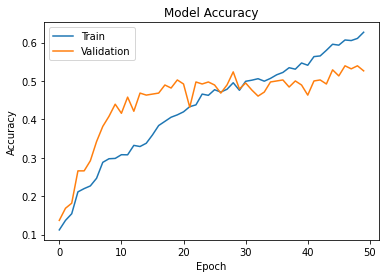

In [127]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:** 


*   We can see from the above plot that **the training accuracy of the  model was good but the validation accuracy was not good enough.**
*   The model seems to be guilty of overfitting on the data.

#### <b> Evaluating the model on test data

In [128]:
accuracy = model1.evaluate(X_test_normalized, y_test_encoded, verbose=2)

30/30 - 0s - loss: 1.6930 - accuracy: 0.5453 - 330ms/epoch - 11ms/step


#### <b> Generating the predictions using test data

In [129]:
# Here we would get the output as probablities for each category
y_pred=model1.predict(X_test_normalized)

In [130]:
y_pred

array([[1.0236165e-03, 1.7790142e-01, 1.5086893e-02, ..., 2.2328195e-01,
        2.0954771e-01, 2.5536118e-02],
       [5.7671056e-04, 8.9045241e-02, 2.1243127e-02, ..., 5.0693862e-02,
        6.1518317e-01, 1.4491549e-02],
       [2.7869035e-06, 3.7790215e-04, 7.9321981e-05, ..., 6.7262232e-02,
        2.0170467e-10, 4.4064566e-02],
       ...,
       [1.7304195e-05, 8.9476204e-10, 5.9155846e-06, ..., 8.8706417e-03,
        1.5029157e-16, 7.9918313e-01],
       [4.5299580e-06, 2.6835813e-04, 5.7335154e-05, ..., 1.3025868e-01,
        3.8847234e-10, 6.3798346e-02],
       [2.3236406e-07, 2.5431160e-07, 1.0558372e-07, ..., 1.0053057e-01,
        1.1117584e-13, 4.5498218e-02]], dtype=float32)

#### <b> Generating the Classification Report

In [131]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)


from sklearn.metrics import classification_report
print(classification_report(y_test_arg,y_pred_arg))

              precision    recall  f1-score   support

           0       0.33      0.02      0.04        53
           1       0.54      0.41      0.47        78
           2       0.67      0.48      0.56        58
           3       0.85      0.57      0.68       122
           4       0.24      0.25      0.25        44
           5       0.55      0.75      0.63        95
           6       0.62      0.71      0.66       131
           7       0.26      0.30      0.28        44
           8       0.45      0.76      0.57       103
           9       0.44      0.37      0.40        46
          10       0.62      0.80      0.70        99
          11       0.50      0.34      0.40        77

    accuracy                           0.55       950
   macro avg       0.51      0.48      0.47       950
weighted avg       0.55      0.55      0.53       950



- Class 0 has very very poor recall and f1_score. Its precision is not not much as well.
- Class 4 has also poor precision, recall and f1_score
- However, Class 10 has the better recall and f1_score

#### <b> Plotting the Confusion Matrix

*   The Confusion matrix is also defined as an inbuilt function in the TensorFlow module, so we can use that for evaluating the classification model.
*   The Confusion matrix expects categorical data as input. However, y_test_encoded is an encoded value, whereas y_pred has probabilities. So,we must retrieve the categorical values from the encoded values.
*   We will use the `argmax()` function to obtain the maximum value over each category on both y_test_encoded and y_pred and obtain their respective classes.

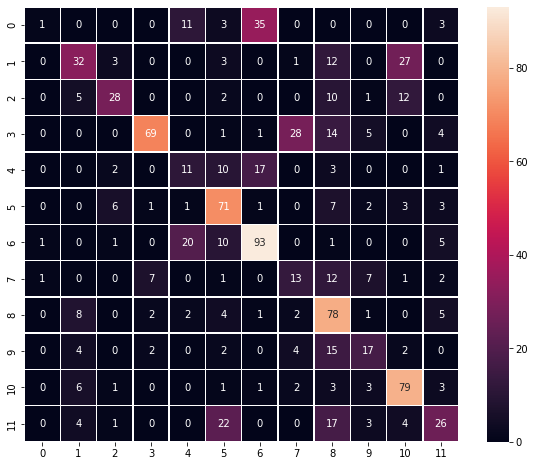

In [132]:
# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

<b> Observations</b><br>

- We observe that almost all the classes are not predicted correctly. 
- In comparison to the rest, we can see that classe 5 and 10 are almost well classified.
- We can also observe that classes 0,1,2,3,4,6,7,8,9 and 11 are mostly misclassified.

### **Build another model to implement these improvements**

As we can see, our initial model appears to overfit. Therefore we'll try to address this problem with data augmentation to check if we can improve the model's performance.

# **6) Model Performance Improvement**

### <b> Data Augmentation

In most of the real-world case studies, it is challenging to acquire a large number of images and then train CNNs. To overcome this problem, one approach we might consider is **Data Augmentation**. CNNs have the property of **translational invariance**, which means they can recognise an object even if its appearance shifts translationally in some way. <br> Taking this attribute into account, we can augment the images using the techniques listed below - <br>
**1. Horizontal Flip** (should be set to True/False) <br>
**2. Vertical Flip** (should be set to True/False) <br>
**3. Height Shift** (should be between 0 and 1) <br>
**4. Width Shift** (should be between 0 and 1) <br>
**5. Rotation** (should be between 0 and 180) <br>
**6. Shear** (should be between 0 and 1) <br>
**7. Zoom** (should be between 0 and 1) etc. <br>

`Remember, data augmentation should not be used in the validation/test data set.`

In [133]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [134]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [135]:
# All images to be rescaled by 1/255.
train_datagen = ImageDataGenerator( 
                              rotation_range=40, 
                              fill_mode='nearest'
                              )

In [136]:
# Intializing a sequential model
model2 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(128, 128, 3)))
# Adding max pooling to reduce the size of output of first conv layer
model2.add(MaxPooling2D((2, 2), padding = 'same'))
model2.add(BatchNormalization())

# Second Conv2D
model2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
# Adding max pooling to reduce the size of output of first conv layer
model2.add(MaxPooling2D((2, 2), padding = 'same'))
#model.add(BatchNormalization())

# Third Conv2D
model2.add(Conv2D(16, (3, 3), activation='relu', padding="same"))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())

# Adding a fully connected dense layer with 32 neurons    
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.3))

# Adding a fully connected dense layer with 16 neurons    
model2.add(Dense(16, activation='relu'))


# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
model2.add(Dense(12, activation='softmax'))

# Adam optimize Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                        

In [137]:
%%time
# Epochs
epochs = 50
# Batch size
batch_size = 16

history = model2.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size, 
                                       seed=42,
                                       shuffle=False),
                    
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/50
213/213 [==============================] - 14s 65ms/step - loss: 2.2711 - accuracy: 0.2441 - val_loss: 2.3978 - val_accuracy: 0.2132
Epoch 2/50
213/213 [==============================] - 14s 63ms/step - loss: 1.8985 - accuracy: 0.3381 - val_loss: 1.9356 - val_accuracy: 0.3395
Epoch 3/50
213/213 [==============================] - 13s 63ms/step - loss: 1.7703 - accuracy: 0.3731 - val_loss: 1.7549 - val_accuracy: 0.4316
Epoch 4/50
213/213 [==============================] - 13s 63ms/step - loss: 1.6903 - accuracy: 0.3957 - val_loss: 2.4477 - val_accuracy: 0.3026
Epoch 5/50
213/213 [==============================] - 13s 63ms/step - loss: 1.5983 - accuracy: 0.4271 - val_loss: 1.7246 - val_accuracy: 0.4289
Epoch 6/50
213/213 [==============================] - 14s 64ms/step - loss: 1.5564 - accuracy: 0.4445 - val_loss: 1.6008 - val_accuracy: 0.4579
Epoch 7/50
213/213 [==============================] - 13s 63ms/step - loss: 1.4860 - accuracy: 0.4791 - val_loss: 1.5470 - val_accuracy:

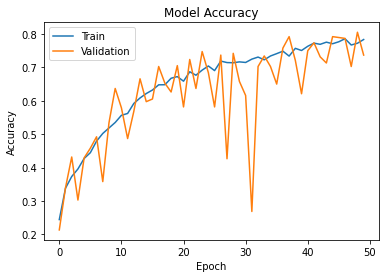

In [138]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

From the plot above, the training accuracy is growing with stability whereas the validation accuracy fluctuate a lot but both curve converge at the end
- Globally the model tends to fit the data

In [139]:
accuracy = model2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

30/30 - 0s - loss: 0.8537 - accuracy: 0.7305 - 278ms/epoch - 9ms/step


In [140]:
# Here we would get the output as probablities for each category
y_pred=model2.predict(X_test_normalized)

In [141]:
y_pred

array([[1.58615036e-19, 9.03404653e-01, 8.69671553e-02, ...,
        5.62023633e-05, 9.80569439e-06, 8.92177184e-07],
       [4.84123029e-06, 5.77904768e-02, 8.58646445e-03, ...,
        1.92203745e-01, 6.69230998e-01, 2.03659143e-02],
       [4.08293346e-07, 1.93508565e-09, 4.15813794e-16, ...,
        6.02934174e-02, 4.45261016e-04, 3.77233664e-06],
       ...,
       [8.70527350e-04, 3.35920731e-08, 3.06919446e-06, ...,
        3.11841213e-05, 1.36934233e-07, 3.73131079e-05],
       [6.26402616e-04, 7.28647938e-05, 1.37585047e-07, ...,
        2.88644105e-01, 5.59019949e-03, 6.87308330e-03],
       [9.70876044e-07, 2.97261226e-06, 1.29619605e-11, ...,
        4.04877588e-02, 8.43223110e-02, 7.01600164e-02]], dtype=float32)

#### <b> Generating the Classification Report

In [142]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)


from sklearn.metrics import classification_report
print(classification_report(y_test_arg,y_pred_arg))

              precision    recall  f1-score   support

           0       0.33      0.55      0.41        53
           1       0.80      0.94      0.86        78
           2       0.79      0.71      0.75        58
           3       0.84      0.78      0.81       122
           4       0.62      0.70      0.66        44
           5       0.95      0.64      0.77        95
           6       0.72      0.56      0.63       131
           7       0.59      0.75      0.66        44
           8       0.72      0.83      0.77       103
           9       0.64      0.59      0.61        46
          10       0.92      0.85      0.88        99
          11       0.75      0.79      0.77        77

    accuracy                           0.73       950
   macro avg       0.72      0.72      0.72       950
weighted avg       0.76      0.73      0.74       950



We can observe that our accuracy has improved compared to our previous model.

- Class 0 has poor precision and f1_score. Its recall is pretty good.
- The other classes have their precision, recall and f1_score greater than 60%
- However, Classes 1 and 10 have the best precision, recall and f1_score

#### <b> Plotting the Confusion Matrix

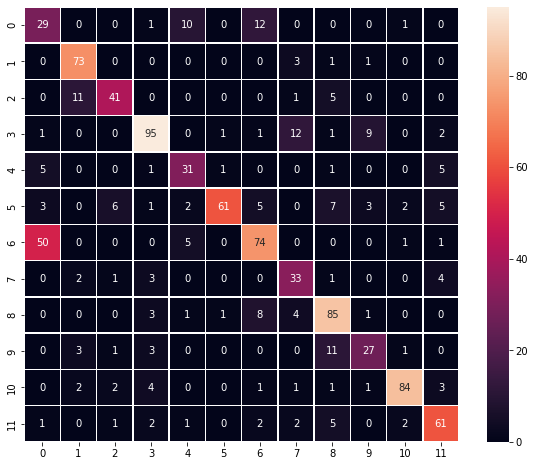

In [143]:
# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

**Observation:**
- The confusion matrix appears to be improving as well, however there is still some confusion with the 0,3,6 and 9 classes of plant seedlings.
- The 6th class is the most confused class among all.
- We can observe that this model has outperformed our previous model.

### <b> Data Augmentation and Resampling

In this approach, We combine data augmentation and re-sampling technique by applying selective data augmentation to balance the dataset by re-sampling less frequent samples to adjust their amount in comparison with predominant samples.

#### <b> Calculation of the weights of our image classes

As our dataset is imbalanced, our loss function is influenced by assigning relatively higher costs to examples from minority classes. We can use the re-weighting method from scikit-learn library to estimate class weights for unbalanced dataset with ‘balanced’ as a parameter

In [144]:
# Convert target (class) variables to numpy
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()
y_test = y_test.to_numpy()

In [145]:
# Reshape the target variables
y_train = y_train.reshape(-1,)
y_val = y_val.reshape(-1,)
y_test = y_test.reshape(-1,)

In [146]:
# Shape of the reshaped target variables
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(3420,)
(380,)
(950,)


In [147]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight = "balanced", classes= np.unique(y_train), y= y_train)

In [148]:
class_weights

array([1.50793651, 1.01423488, 1.38349515, 0.64772727, 1.79245283,
       0.83333333, 0.60509554, 1.79245283, 0.76612903, 1.70658683,
       0.79831933, 1.02888087])

In [149]:
class_weights = dict(enumerate(class_weights.flatten(), 0))

In [150]:
class_weights

{0: 1.507936507936508,
 1: 1.0142348754448398,
 2: 1.383495145631068,
 3: 0.6477272727272727,
 4: 1.7924528301886793,
 5: 0.8333333333333334,
 6: 0.6050955414012739,
 7: 1.7924528301886793,
 8: 0.7661290322580645,
 9: 1.7065868263473054,
 10: 0.7983193277310925,
 11: 1.0288808664259927}

In [151]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [152]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [153]:
from keras.utils.data_utils import Sequence
from imblearn.over_sampling import RandomOverSampler
from imblearn.tensorflow import balanced_batch_generator

class BalancedDataGenerator(Sequence):
    """ImageDataGenerator + RandomOversampling"""
    def __init__(self, x, y, train_datagen, batch_size=32):
        self.datagen = train_datagen
        self.batch_size = min(batch_size, x.shape[0])
        train_datagen.fit(x)
        self.gen, self.steps_per_epoch = balanced_batch_generator(x.reshape(x.shape[0], -1), y, sampler=RandomOverSampler(), batch_size=self.batch_size, keep_sparse=True)
        self._shape = (self.steps_per_epoch * batch_size, *x.shape[1:])
        
    def __len__(self):
        return self.steps_per_epoch

    def __getitem__(self, idx):
        x_batch, y_batch = self.gen.__next__()
        x_batch = x_batch.reshape(-1, *self._shape[1:])
        return self.datagen.flow(x_batch, y_batch, batch_size=self.batch_size).next()

In [154]:
# Intializing a sequential model
model3 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model3.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(128, 128, 3)))
# Adding max pooling to reduce the size of output of first conv layer
model3.add(MaxPooling2D((2, 2), padding = 'same'))
model3.add(BatchNormalization())

# Second Conv2D
model3.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
# Adding max pooling to reduce the size of output of first conv layer
model3.add(MaxPooling2D((2, 2), padding = 'same'))
#model.add(BatchNormalization())

# Third Conv2D
model3.add(Conv2D(16, (3, 3), activation='relu', padding="same"))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model3.add(Flatten())

# Adding a fully connected dense layer with 32 neurons    
model3.add(Dense(32, activation='relu'))
model3.add(Dropout(0.3))

# Adding a fully connected dense layer with 16 neurons    
model3.add(Dense(16, activation='relu'))


# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
model3.add(Dense(12, activation='softmax'))

# Adam optimize Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                        

In [155]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [156]:
checkpoint = ModelCheckpoint("model_weights.h5",monitor='val_accuracy',
                            save_weights_only=True, mode='max',verbose=1)

stop = EarlyStopping(monitor='val_accuracy', patience =5,
                      verbose=0, mode='auto', baseline=None, 
                      restore_best_weights=False)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,model='auto', lookback_epochs=3)

In [157]:
balanced_gen = BalancedDataGenerator(X_train_normalized, y_train_encoded, train_datagen, batch_size=16)
balanced_gen_val = BalancedDataGenerator(X_val_normalized, y_val_encoded, train_datagen, batch_size=16)
steps_per_epoch = balanced_gen.steps_per_epoch

In [158]:
%%time
history = model3.fit_generator(balanced_gen, steps_per_epoch, class_weight=class_weights,validation_data=balanced_gen_val,epochs=50,shuffle=True,
                              callbacks=reduce_lr)

Epoch 1/50
353/353 [==============================] - 27s 74ms/step - loss: 2.3739 - accuracy: 0.2275 - val_loss: 2.0685 - val_accuracy: 0.2147 - lr: 0.0010
Epoch 2/50
353/353 [==============================] - 24s 68ms/step - loss: 1.7368 - accuracy: 0.3870 - val_loss: 1.6487 - val_accuracy: 0.3718 - lr: 0.0010
Epoch 3/50
353/353 [==============================] - 24s 68ms/step - loss: 1.5269 - accuracy: 0.4363 - val_loss: 3.1900 - val_accuracy: 0.2484 - lr: 0.0010
Epoch 4/50
353/353 [==============================] - 24s 68ms/step - loss: 1.3639 - accuracy: 0.4917 - val_loss: 1.3822 - val_accuracy: 0.4712 - lr: 0.0010
Epoch 5/50
353/353 [==============================] - 26s 73ms/step - loss: 1.2968 - accuracy: 0.5213 - val_loss: 1.2182 - val_accuracy: 0.5497 - lr: 0.0010
Epoch 6/50
353/353 [==============================] - 24s 68ms/step - loss: 1.2148 - accuracy: 0.5481 - val_loss: 1.2513 - val_accuracy: 0.5433 - lr: 0.0010
Epoch 7/50
353/353 [==============================] - 24s 

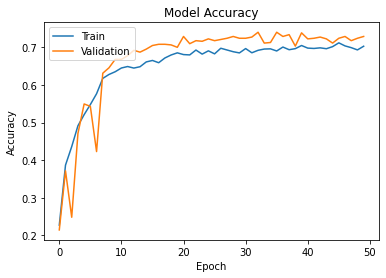

In [159]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:** 


*   We can see from the above plot that **the training accuracy became flat while the validation accuracy continued to improve before flattening.**
*   The model seems to underfit a little on the data.

In [160]:
accuracy = model3.evaluate(X_test_normalized, y_test_encoded, verbose=2)

30/30 - 0s - loss: 0.8831 - accuracy: 0.7000 - 433ms/epoch - 14ms/step


In [161]:
# Here we would get the output as probablities for each category
y_pred=model3.predict(X_test_normalized)

In [162]:
y_pred

array([[3.5831095e-26, 2.5335454e-19, 8.9318739e-18, ..., 2.4287964e-13,
        1.2466162e-12, 9.6218946e-07],
       [1.0423657e-05, 4.9967024e-02, 6.0218461e-03, ..., 3.6669850e-01,
        4.9027091e-01, 1.2515623e-02],
       [1.7747266e-06, 3.6547722e-06, 6.9001635e-06, ..., 1.6214067e-01,
        4.8410523e-04, 2.2025809e-03],
       ...,
       [1.0221961e-03, 2.3129864e-05, 9.3512883e-04, ..., 4.6827417e-02,
        2.2167081e-04, 1.9612845e-03],
       [6.1206643e-05, 1.4247172e-04, 3.5700278e-04, ..., 1.6358924e-01,
        1.7383527e-03, 1.9443246e-02],
       [5.1988201e-05, 5.6750304e-04, 2.0015113e-04, ..., 3.4264299e-01,
        5.2478410e-02, 1.0609831e-01]], dtype=float32)

#### <b> Generating the Classification Report

In [163]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)


from sklearn.metrics import classification_report
print(classification_report(y_test_arg,y_pred_arg))

              precision    recall  f1-score   support

           0       0.31      0.77      0.44        53
           1       0.80      0.90      0.85        78
           2       0.76      0.90      0.83        58
           3       0.95      0.77      0.85       122
           4       0.69      0.82      0.75        44
           5       0.68      0.43      0.53        95
           6       0.80      0.31      0.45       131
           7       0.77      0.98      0.86        44
           8       0.86      0.73      0.79       103
           9       0.51      0.80      0.62        46
          10       0.88      0.75      0.81        99
          11       0.61      0.79      0.69        77

    accuracy                           0.70       950
   macro avg       0.72      0.75      0.71       950
weighted avg       0.76      0.70      0.70       950



We can observe that our accuracy has decreased compared to our model n°2.

- Class 0 still has a poor precision and f1_score. Its recall is doing very well.
- Class 1, 3 and 7 have the best performance (precision, recall and f1_score.
- However, the rest of the classes' performance are not bad

#### <b> Plotting the Confusion Matrix

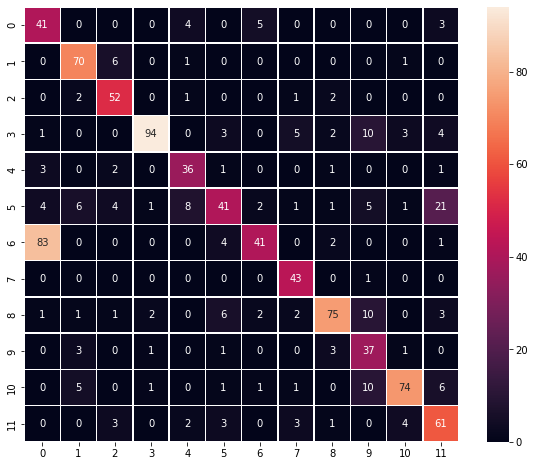

In [164]:
# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

**Observation:**
- The confusion matrix appears to misclassify the classes 3,5,6,8 and 10 of plant seedlings.
- The 6th class is the most confused class among all.
- We can observe that this model has underperformed compared to our previous model2.

### <b> Transfer Learning using VGG16

- Let's try again, but this time, we will be using the idea of **Transfer Learning**. We will be loading a pre-built architecture - **VGG16**, which was trained on the ImageNet dataset and is the runner-up in the ImageNet competition in 2014.

- For training VGG16, we will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, we will replace the existing fully-connected layers with FC layers created specifically for our problem.

In [165]:
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (128,128,3))
vgg_model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                              

In [166]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [167]:
# Intializing a sequential model
new_model = Sequential()

# Adding the convolutional part of the VGG16 model from above
new_model.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
new_model.add(Flatten())


# Adding a fully connected dense layer with 32 neurons    
new_model.add(Dense(32, activation='relu'))
new_model.add(Dropout(0.3))

# Adding a fully connected dense layer with 16 neurons    
new_model.add(Dense(16, activation='relu'))


# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
new_model.add(Dense(12, activation='softmax'))

# Adam optimize Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_3 (Dense)             (None, 32)                262176    
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 12)                204       
                                                                 
Total params: 14,977,596
Trainable params: 262,908
Non

In [168]:
%%time
# Epochs
epochs = 25
# Batch size
batch_size = 16

history_vgg16 = new_model.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size, 
                                       seed=42,
                                       shuffle=False),
                              epochs=epochs,
                              steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                              validation_data=(X_val_normalized,y_val_encoded),
                              verbose=1)

Epoch 1/25
213/213 [==============================] - 20s 87ms/step - loss: 2.3340 - accuracy: 0.1957 - val_loss: 2.1600 - val_accuracy: 0.2526
Epoch 2/25
213/213 [==============================] - 15s 71ms/step - loss: 2.0357 - accuracy: 0.2773 - val_loss: 1.8787 - val_accuracy: 0.3316
Epoch 3/25
213/213 [==============================] - 15s 71ms/step - loss: 1.9004 - accuracy: 0.3149 - val_loss: 1.7450 - val_accuracy: 0.3868
Epoch 4/25
213/213 [==============================] - 15s 71ms/step - loss: 1.8092 - accuracy: 0.3440 - val_loss: 1.6595 - val_accuracy: 0.4105
Epoch 5/25
213/213 [==============================] - 16s 77ms/step - loss: 1.7640 - accuracy: 0.3464 - val_loss: 1.5855 - val_accuracy: 0.4263
Epoch 6/25
213/213 [==============================] - 17s 80ms/step - loss: 1.7351 - accuracy: 0.3569 - val_loss: 1.5540 - val_accuracy: 0.4395
Epoch 7/25
213/213 [==============================] - 15s 71ms/step - loss: 1.6993 - accuracy: 0.3725 - val_loss: 1.4863 - val_accuracy:

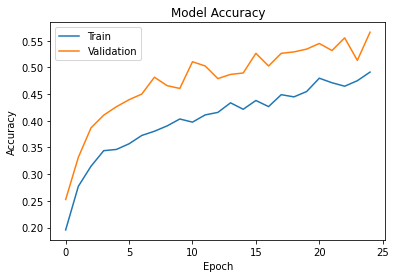

In [169]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:** 


*   We can see from the above plot that **the training accuracy is under the validation accuracy during the whole training process.**
*   This model seems to underfit too much on the data.

In [170]:
accuracy = new_model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

30/30 - 3s - loss: 1.2400 - accuracy: 0.5579 - 3s/epoch - 85ms/step


In [171]:
# Here we would get the output as probablities for each category
y_pred=new_model.predict(X_test_normalized)

In [172]:
y_pred

array([[1.65924233e-10, 6.82821125e-02, 6.31576125e-03, ...,
        1.82630494e-03, 6.20935082e-01, 5.78660006e-03],
       [3.57830487e-07, 1.24290269e-02, 6.95836125e-03, ...,
        1.23113297e-01, 6.01613104e-01, 1.02168638e-02],
       [1.50647911e-05, 5.42065379e-07, 1.13060678e-05, ...,
        9.87146124e-02, 1.31877698e-03, 2.18782946e-03],
       ...,
       [1.98510941e-02, 1.75824296e-02, 2.32459642e-02, ...,
        1.08146347e-01, 6.70793429e-02, 5.08521684e-02],
       [1.33727724e-03, 1.50422304e-04, 3.58678109e-04, ...,
        1.18447460e-01, 1.34349875e-02, 1.19273849e-02],
       [6.39139253e-05, 1.81857345e-03, 1.81288701e-02, ...,
        5.15080169e-02, 8.05052370e-02, 1.78150684e-01]], dtype=float32)

#### <b> Generating the Classification Report

In [173]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)


from sklearn.metrics import classification_report
print(classification_report(y_test_arg,y_pred_arg))

              precision    recall  f1-score   support

           0       0.34      0.19      0.24        53
           1       0.59      0.37      0.46        78
           2       0.44      0.40      0.42        58
           3       0.52      0.79      0.63       122
           4       0.64      0.16      0.25        44
           5       0.48      0.55      0.51        95
           6       0.64      0.92      0.75       131
           7       0.73      0.36      0.48        44
           8       0.68      0.52      0.59       103
           9       0.00      0.00      0.00        46
          10       0.53      0.73      0.61        99
          11       0.56      0.66      0.61        77

    accuracy                           0.56       950
   macro avg       0.51      0.47      0.46       950
weighted avg       0.53      0.56      0.52       950



- This fourth model has not been able to learn anything from the Class 9. Its precision, recall and f1_score are equal to 0 each. 
- Class 0 and 4 have also poor precision, recall and f1_score
- However, Class 6 has the better recall and f1_score

#### <b> Plotting the Confusion Matrix

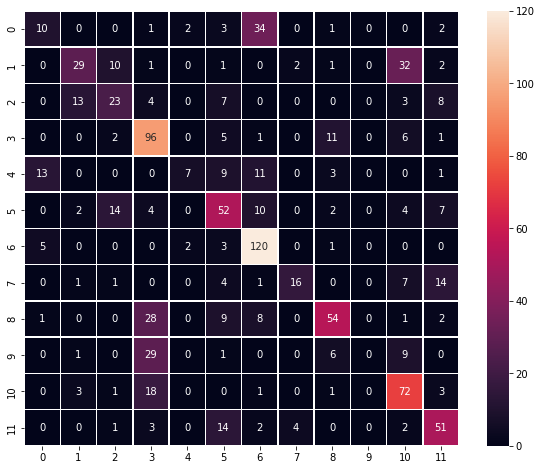

In [174]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

- According to the confusion matrix and accuracy curve, the VGG16 model has underperformed Model-2 and Model-3 and is just slightly greater to the Model-1.
- Only the class 6 is well classified.

**Thus we can say that Model-2 is our best model and we can use this model to predict and visualize some test images.**

### **Visualizing the prediction:**

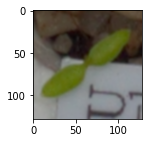

Predicted Label ['Common Chickweed']
True Label Common Chickweed


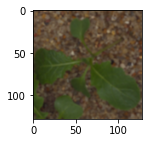

Predicted Label ['Charlock']
True Label Charlock


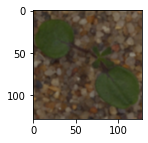

Predicted Label ['Cleavers']
True Label Cleavers


In [175]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[2].reshape(1,128,128,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[33].reshape(1,128,128,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[36].reshape(1,128,128,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])  

**From the image above, even though the accuracy of our best model is not perfect on our test set, however, we can see it predicts very well**

# **7) Conclusion and key takeaways**
- We can observe from the confusion matrix of all the models that our Data Augmentation model (Model-2) was the best model because it predicted the majority of the classes better than the other models.
- The test accuracy of the VGG16 model is 56%.
- Data Augmentation and Resampling (Model-3) has also helped in improving the model.
- Transfer learning model didn't bring significant value to our ordinary Convolution Neural Network model. It is therefore useless for this CNN use case. 

In [177]:
pd.DataFrame({'Models':['Base CNN Model','CNN Model with Data Augmentation', 'CNN Model with Data Augmentation and Resampling','Transfer Learning Model'],'Train Accuracy':['63%','78%','70%','49%'],'Validation Accuracy':['53%','74%','73%','57%'],'Test Accuracy':['55%','73%','70%','56%']})

,Models,Train Accuracy,Validation Accuracy,Test Accuracy
0,Base CNN Model,63%,53%,55%
1,CNN Model with Data Augmentation,78%,74%,73%
2,CNN Model with Data Augmentation and Resampling,70%,73%,70%
3,Transfer Learning Model,49%,57%,56%


### <b> Scope of Improvement

- These models can be further improved by training with different filter sizes and different number of filters.
- Data Augmentation, our best model, can be performed more and dropout_rate can be changed to improve the model performance.
- We could have used other sampling methods (Oversampling with thresholding, Undersampling with thresholding) to deal with the inbalanced classes
- Certainly, Other Transfer Learning architectures could have also be used to train the CNN model and these models could have been used for classification